In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer

In [2]:
# Load the dataset
taxi_data = pd.read_csv("../output_sample.csv")

In [3]:
taxi_data = taxi_data[(taxi_data['payment_type'] == 1) &
                      (taxi_data['fare_amount'] >= 0) &
                      (taxi_data['tip_amount'] >= 0) &
                      (taxi_data['tip_amount'] < taxi_data['fare_amount'])]



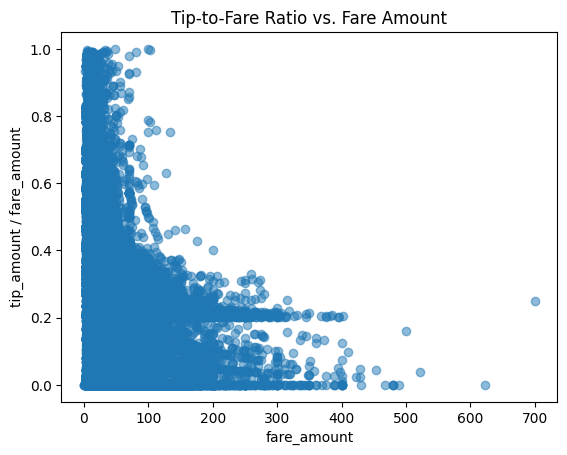

Slope: -0.0017341104094448594
Intercept: 0.2808061927629522


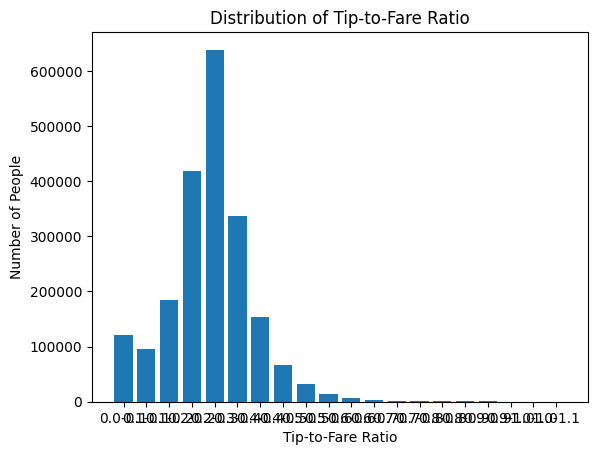

In [4]:
y = taxi_data['tip_amount'] / taxi_data['fare_amount']

# Select the columns for analysis
X = taxi_data[['fare_amount']]

# Plot the relationship between X and y
plt.scatter(X, y, alpha=0.5)
plt.xlabel('fare_amount')
plt.ylabel('tip_amount / fare_amount')
plt.title('Tip-to-Fare Ratio vs. Fare Amount')
plt.show()

# Fit a linear regression model
reg = LinearRegression()
reg.fit(X, y)

# Print the slope and intercept of the linear regression line
print('Slope:', reg.coef_[0])
print('Intercept:', reg.intercept_)

# Calculate the number of people that have a tip-to-fare ratio of 0.1, 0.2, 0.3, and so on
bins = np.arange(0, 1.1, 0.05)
hist, _ = np.histogram(y, bins=bins)
bin_labels = [f'{bins[i]:.1f}-{bins[i+1]:.1f}' for i in range(len(bins)-1)]
plt.bar(bin_labels, hist)
plt.xlabel('Tip-to-Fare Ratio')
plt.ylabel('Number of People')
plt.title('Distribution of Tip-to-Fare Ratio')
plt.show()